# L'influence des promotions sur les ventes d'un supermarché 

Auteurs : Jarod Vanderlynden , Philippe Mathieu, [CRISTAL Lab](http://www.cristal.univ-lille.fr), [SMAC team](https://www.cristal.univ-lille.fr/?rubrique27&eid=17), [Lille University](http://www.univ-lille.fr), Romain Warlop, [fifty-five](https://www.fifty-five.com/fr/)

email : jarod.vanderlynden.etu@univ-lille.fr

Création : 02/02/2023

Cette page est en cours de construction

***

Sur cette feuille jupyter l'objectif est de montrer différentes simulations intéressante du modèle présenté dans l'article "_Comprendre l'impact des stratégies de prix sur le comportement des consommateurs_"

### Pas de promotion / promotion de 4 ticks / promotion de 20 ticks sur une promotion de 40%

In [2]:
import time
import pandas as pd
from src.model import *
import seaborn as sns
sns.set_theme()

Ce qu'on observe c'est que plus la promotion dure plus le produit en promotion gagne des parts de marché et de la fidélisation, mais durant la promotion le pack perd aussi en rentabilité, le chiffre d'affaires baisse, notamment car ici c'est une remise importante (40%).

***

### Pas de promotion / promotion de 4 ticks / promotion de 20 ticks, sur une promotion de 20%

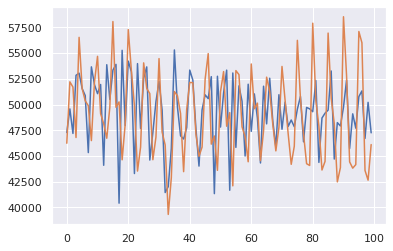

In [3]:
drevenues = {}
dproducts = {}
drevenues2 = {}
dproducts2 = {}
for i in range(20):
    # Simulation avec promotion
    np.random.seed(3) # Random seed set for the generation of packs and agents to have the same on all simulations.
    test = generate_pack_categorie("bananas") # Creation of the category of packs
    sma20Promo = SMA([test],300,100)
    #sma10Promo.initialize(price=1, quality=4, promophile=1, sat_alpha=2, phi=0.3, c = 3, inertia = 3)
    sma20Promo.initialize()
    sma20Promo.makePromo(0,20,(30,34),"bananas","bananas0")
    np.random.seed(int(10000 * time.time()) % 2**32) # We reintegrate randomness before launching the simulation.
    sma20Promo.run()
    
    # Simulation avec une promotion plus longue (20 ticks)
    np.random.seed(3) # Random seed set for the generation of packs and agents to have the same on all simulations.
    test = generate_pack_categorie("bananas") # Creation of the category of packs
    sma20LongPromo = SMA([test],300,100)
    #sma10LongPromo.initialize(price=1, quality=4, promophile=1, sat_alpha=2, phi=0.3, c = 3, inertia = 3)
    sma20LongPromo.initialize()
    sma20LongPromo.makePromo(0,20,(30,50),"bananas","bananas0")
    np.random.seed(int(10000 * time.time()) % 2**32) # We reintegrate randomness before launching the simulation.
    sma20LongPromo.run()    
    drevenues[i] = sma20Promo.revenues
    drevenues2[i] = sma20LongPromo.revenues
    j=0
    for pack in sma20Promo.packs_categories[0].pack_list:  #Cette ligne ne fonctionne qu'avec une seule catégorie. 
        if not j in dproducts.keys():
            dproducts[j] = {}
        dproducts[j][i] = sma20Promo.cumulative_nb_bought_per_pack[pack.name]
        j+=1
    j=0
    for pack in sma20LongPromo.packs_categories[0].pack_list:  #Cette ligne ne fonctionne qu'avec une seule catégorie. 
        if not j in dproducts2.keys():
            dproducts2[j] = {}
        dproducts2[j][i] = sma20LongPromo.cumulative_nb_bought_per_pack[pack.name]
        j+=1

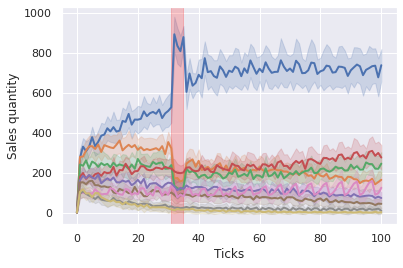

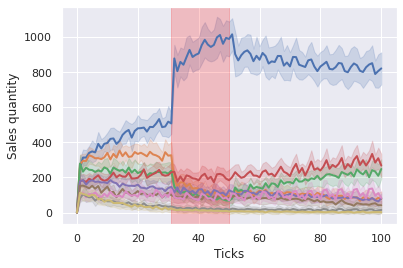

In [5]:
for key in dproducts.keys():
    df = pd.DataFrame(data = dproducts[key])
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    new_color =  plt.plot(df.index , df.moy, linewidth=2, linestyle='-',
    label='exp')[0].get_color()
    plt.fill_between(df.index,df.moy-(df.ecart), df.moy+(df.ecart),
    color=new_color, alpha=0.2)
plt.ylabel("Sales quantity")
plt.xlabel("Ticks")
plt.axvspan(31, 35, alpha=0.2, color='red')
plt.savefig("shortPromo.svg",bbox_inches='tight')
plt.show()




for key in dproducts2.keys():
    df = pd.DataFrame(data = dproducts2[key])
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    new_color = plt.plot(df.index , df.moy, linewidth=2, linestyle='-',
    label='exp')[0].get_color()
    plt.fill_between(df.index,df.moy-(df.ecart), df.moy+(df.ecart),
    color=new_color, alpha=0.2)
plt.ylabel("Sales quantity")
plt.xlabel("Ticks")
plt.axvspan(31, 50, alpha=0.2, color='red')
plt.savefig("longPromo.svg",bbox_inches='tight')
plt.show()

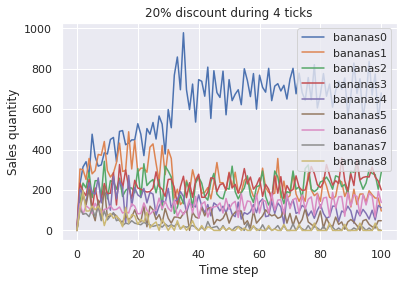

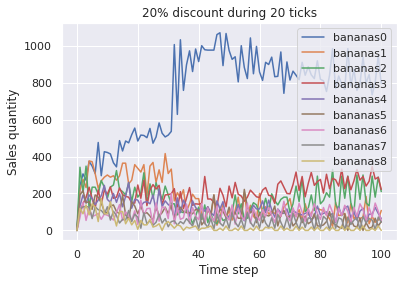

In [4]:
#plt.title("Pas de promotion")
#sma.showPacksSales()
plt.title("20% discount during 4 ticks")
sma20Promo.showPacksSales(show=False)
plt.savefig("shortPromotion.svg",bbox_inches='tight')
plt.show()

plt.title("20% discount during 20 ticks")
sma20LongPromo.showPacksSales(show=False)
plt.savefig("longPromotion.svg",bbox_inches='tight')
plt.show()

***

### Différence entre une réduction du prix et une promotion

In [4]:
drevenues = {}
dproducts = {}
drevenues2 = {}
dproducts2 = {}
for i in range(20):
    print(i,end=" ")
    # Simulation avec promotion
    np.random.seed(3) # Random seed set for the generation of packs and agents to have the same on all simulations.
    test = generate_pack_categorie("bananas") # Creation of the category of packs
    sma20Promo = SMA([test],300,100)
#     sma10Promo.initialize(price=1, quality=4, promophile=1, sat_alpha=2, phi=0.3, c = 3, inertia = 3)
    sma20Promo.initialize(price = 5, quality = 10, promophile = 0.5, inertia = 1)
    sma20Promo.makePromo(0,20,(30,34),"bananas","bananas0")
    np.random.seed(int(10000 * time.time()) % 2**32) # We reintegrate randomness before launching the simulation.
    sma20Promo.run()

    # Simulation avec une promotion plus longue (20 ticks)
    np.random.seed(3) # Random seed set for the generation of packs and agents to have the same on all simulations.
    test = generate_pack_categorie("bananas") # Creation of the category of packs
    sma20reduce = SMA([test],300,100)
    #sma10LongPromo.initialize(price=1, quality=4, promophile=1, sat_alpha=2, phi=0.3, c = 3, inertia = 3)
    sma20reduce.initialize(price = 5, quality = 10, promophile = 0.5, inertia = 1)
    sma20reduce.reducePrice(20, 30, 0, 0)
    sma20reduce.reducePrice(-25, 34, 0, 0)
    np.random.seed(int(10000 * time.time()) % 2**32) # We reintegrate randomness before launching the simulation.
    sma20reduce.run()
    
    drevenues[i] = sma20Promo.revenues
    drevenues2[i] = sma20reduce.revenues
    j=0
    for pack in sma20Promo.packs_categories[0].pack_list:  #Cette ligne ne fonctionne qu'avec une seule catégorie. 
        if not j in dproducts.keys():
            dproducts[j] = {}
        dproducts[j][i] = sma20Promo.cumulative_nb_bought_per_pack[pack.name]
        j+=1
    j=0
    for pack in sma20reduce.packs_categories[0].pack_list:  #Cette ligne ne fonctionne qu'avec une seule catégorie. 
        if not j in dproducts2.keys():
            dproducts2[j] = {}
        dproducts2[j][i] = sma20reduce.cumulative_nb_bought_per_pack[pack.name]
        j+=1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

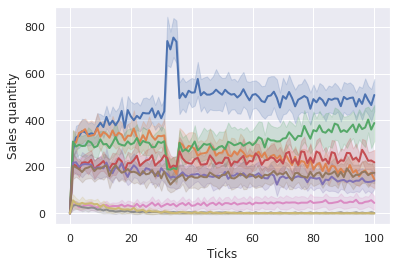

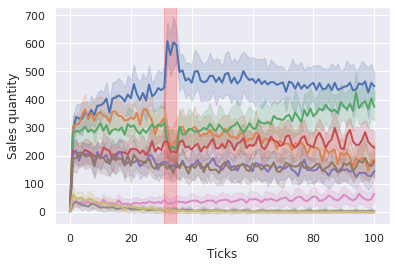

In [5]:
for key in dproducts.keys():
    df = pd.DataFrame(data = dproducts[key])
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    new_color =  plt.plot(df.index , df.moy, linewidth=2, linestyle='-',
    label='exp')[0].get_color()
    plt.fill_between(df.index,df.moy-(df.ecart), df.moy+(df.ecart),
    color=new_color, alpha=0.2)
plt.ylabel("Sales quantity")
plt.xlabel("Ticks")
plt.savefig("classic.svg",bbox_inches='tight')
plt.show()
# plt.savefig("NbAcheteurs0.svg",bbox_inches='tight')



for key in dproducts2.keys():
    df = pd.DataFrame(data = dproducts2[key])
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    new_color = plt.plot(df.index , df.moy, linewidth=2, linestyle='-',
    label='exp')[0].get_color()
    plt.fill_between(df.index,df.moy-(df.ecart), df.moy+(df.ecart),
    color=new_color, alpha=0.2)
plt.ylabel("Sales quantity")
plt.xlabel("Ticks")
plt.axvspan(31, 35, alpha=0.2, color='red')
plt.savefig("reduction.svg",bbox_inches='tight')
plt.show()


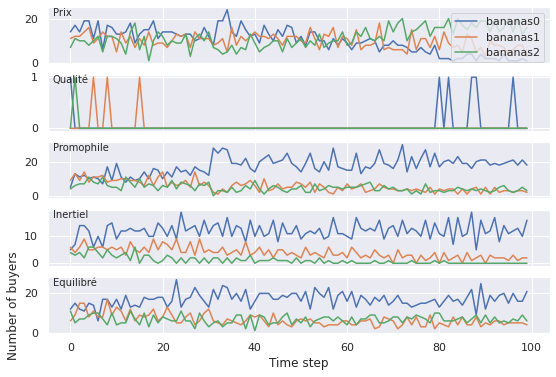

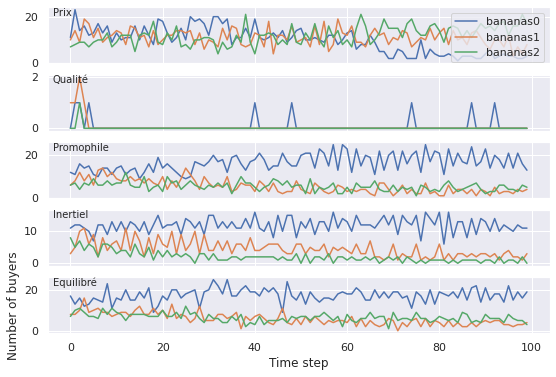

In [6]:
sma20Promo.showProfileSales()
sma20reduce.showProfileSales()

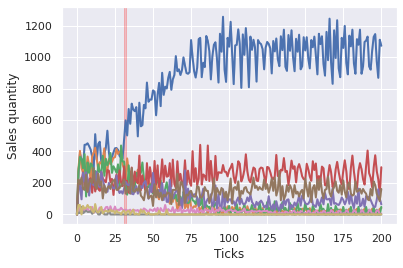

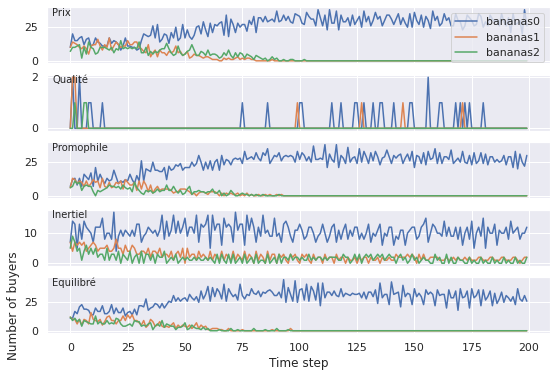

In [7]:
drevenues = {}
dproducts = {}
drevenues2 = {}
dproducts2 = {}
for i in range(2):
    np.random.seed(3) # Random seed set for the generation of packs and agents to have the same on all simulations.
    test = generate_pack_categorie("bananas") # Creation of the category of packs
    sma20reduce = SMA([test],300,200)
    #sma10LongPromo.initialize(price=1, quality=4, promophile=1, sat_alpha=2, phi=0.3, c = 3, inertia = 3)
    sma20reduce.initialize(price = 5, quality = 10, promophile = 0.5, inertia = 1)
    sma20reduce.reducePrice(20, 30, 0, 0)
    np.random.seed(int(10000 * time.time()) % 2**32) # We reintegrate randomness before launching the simulation.
    sma20reduce.run()
drevenues[i] = sma20Promo.revenues
drevenues2[i] = sma20reduce.revenues
j=0
for pack in sma20reduce.packs_categories[0].pack_list:  #Cette ligne ne fonctionne qu'avec une seule catégorie. 
    if not j in dproducts.keys():
        dproducts[j] = {}
    dproducts[j][i] = sma20reduce.cumulative_nb_bought_per_pack[pack.name]
    j+=1
for key in dproducts.keys():
    df = pd.DataFrame(data = dproducts[key])
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    new_color = plt.plot(df.index , df.moy, linewidth=2, linestyle='-',
    label='exp')[0].get_color()
    plt.fill_between(df.index,df.moy-(df.ecart), df.moy+(df.ecart),
    color=new_color, alpha=0.2)
plt.ylabel("Sales quantity")
plt.xlabel("Ticks")
plt.axvspan(31, 32, alpha=0.2, color='red')
plt.show()
sma20reduce.showProfileSales()

On observe qu'une simple réduction temporaire du prix à un impact plus faible qu'une promotion. L'impact court terme de la promotion est de 76% de ventes additionnelles (durant la promotion) contre 45% pour la réduction et l'impact long terme est de 28% de ventes additionnelles pour la promotion (fidélisation) contre 20% pour la réduction. En effet, les agents promophiles ne perçoivent pas cette réduction comme une promotion. Seules les agents orienté prix sont réellement sensible à ce genre de changements. Enfin si on réalise une réduction à long terme, si les concurrents ne réagissent pas, le produit devenant plus attractif, il gagne en part de marché. Le nombre d'acheteurs de tous les profils augmente, notamment les agents orienté prix en premier lieu mais ils finissent tous pas acheté le produit étant devenu le plus attractif. Cependant cette situation n'existe pas réellement, en effet les concurrents auraient forcément réagis à un moment ou un autre afin de stopper la perte de consommateurs. 

***

### Changements dans la population

#### Population classique (5 profils répartis uniformément) et population composée uniquement de promophiles.

In [18]:
drevenues = {}
dproducts = {}
drevenues2 = {}
dproducts2 = {}
for i in range(20):
    print(i,end=" ")
    # Simulation avec promotion
    np.random.seed(3) # Random seed set for the generation of packs and agents to have the same on all simulations.
    test = generate_pack_categorie("bananas") # Creation of the category of packs
    sma20Promo = SMA([test],300,100)
#     sma10Promo.initialize(price=1, quality=4, promophile=1, sat_alpha=2, phi=0.3, c = 3, inertia = 3)
    sma20Promo.initialize(price = 5, quality = 10, promophile = 0.5, inertia = 1)
    sma20Promo.makePromo(0,20,(30,34),"bananas","bananas0")
    np.random.seed(int(10000 * time.time()) % 2**32) # We reintegrate randomness before launching the simulation.
    sma20Promo.run()
    
    # Simulation avec une promotion plus longue (20 ticks)
    np.random.seed(3) # Random seed set for the generation of packs and agents to have the same on all simulations.
    test = generate_pack_categorie("bananas") # Creation of the category of packs
    sma20promo2 = SMA([test],0,100)
    a = []
    for k in range(300):
        a += [Agent("Agent "+str(k), sma20promo2, profil=Profil({'price': 1,'quality': 1,'inertia': 1,'promophile': np.random.randint(3,15)}))]
    sma20promo2.addAgent(a)
    #sma10LongPromo.initialize(price=1, quality=4, promophile=1, sat_alpha=2, phi=0.3, c = 3, inertia = 3)
    sma20promo2.initialize(price = 5, quality = 10, promophile = 0.5, inertia = 1)
    sma20promo2.makePromo(0,20,(30,34),"bananas","bananas0")
    np.random.seed(int(10000 * time.time()) % 2**32) # We reintegrate randomness before launching the simulation.
    sma20promo2.run()
    
    drevenues[i] = sma20Promo.revenues
    drevenues2[i] = sma20promo2.revenues
    j=0
    for pack in sma20Promo.packs_categories[0].pack_list:  #Cette ligne ne fonctionne qu'avec une seule catégorie. 
        if not j in dproducts.keys():
            dproducts[j] = {}
        dproducts[j][i] = sma20Promo.cumulative_nb_bought_per_pack[pack.name]
        j+=1
    j=0
    for pack in sma20promo2.packs_categories[0].pack_list:  #Cette ligne ne fonctionne qu'avec une seule catégorie. 
        if not j in dproducts2.keys():
            dproducts2[j] = {}
        dproducts2[j][i] = sma20promo2.cumulative_nb_bought_per_pack[pack.name]
        j+=1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

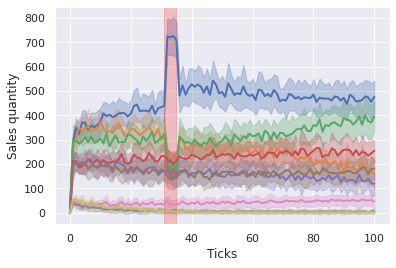

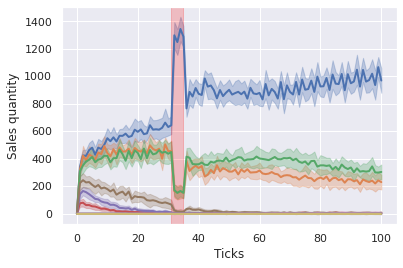

In [19]:
for key in dproducts.keys():
    df = pd.DataFrame(data = dproducts[key])
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    new_color =  plt.plot(df.index , df.moy, linewidth=2, linestyle='-',
    label='exp')[0].get_color()
    plt.fill_between(df.index,df.moy-(df.ecart), df.moy+(df.ecart),
    color=new_color, alpha=0.3)
plt.ylabel("Sales quantity")
plt.xlabel("Ticks")
plt.axvspan(31, 35, alpha=0.2, color='red')
plt.savefig("normalPop.svg",bbox_inches='tight')
plt.show()



for key in dproducts2.keys():
    df = pd.DataFrame(data = dproducts2[key])
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    new_color = plt.plot(df.index , df.moy, linewidth=2, linestyle='-',
    label='exp')[0].get_color()
    plt.fill_between(df.index,df.moy-(df.ecart), df.moy+(df.ecart),
    color=new_color, alpha=0.3)
plt.ylabel("Sales quantity")
plt.xlabel("Ticks")
plt.axvspan(31, 35, alpha=0.2, color='red')
plt.savefig("promophilePop.svg",bbox_inches='tight')
plt.show()

128.57333333333332 231.03333333333333 164.92323232323233
Moyenne général court terme 79.70% Moyenne général long terme 28.30% profil  Prix
Augmentation court terme (durant la promotion) 85.20% Augmentation long terme (après la promotion/ fidélisation) 34.60% 
profil  Qualité
Augmentation court terme (durant la promotion) 76.40% Augmentation long terme (après la promotion/ fidélisation) 34.50% 
profil  Promophile
Augmentation court terme (durant la promotion) 92.60% Augmentation long terme (après la promotion/ fidélisation) 28.10% 
profil  Inertiel
Augmentation court terme (durant la promotion) 73.60% Augmentation long terme (après la promotion/ fidélisation) 26.00% 
profil  Equilibré
Augmentation court terme (durant la promotion) 71.20% Augmentation long terme (après la promotion/ fidélisation) 18.70% 


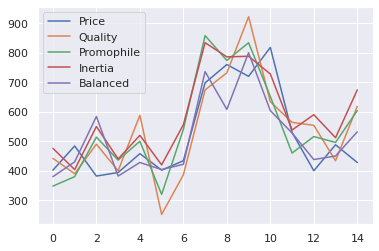

In [23]:
from decimal import *
prof=["Prix","Qualité","Promophile","Inertiel","Equilibré"]
getcontext().prec = 4
ydata = dproducts[0]
ydata2 = dproducts2[0]
# ydata3 = dproducts2[2]
mean_start = 0
mean_promo = 0
mean_loyalty = 0
for y in [ydata]:
  for i in range(5):
    mean_start += np.mean(y[i][:30])
    mean_promo += np.mean(y[i][31:35])
    mean_loyalty += np.mean(y[i][35:])
mean_start = mean_start/15
mean_promo = mean_promo/15
mean_loyalty = mean_loyalty/15
print(mean_start,mean_promo,mean_loyalty)
if mean_promo >= mean_start:
  print("Moyenne général court terme",(Decimal(mean_promo)/Decimal(mean_start)-1)*100,end='% ')
else:
  print("Moyenne général court terme",(1-Decimal(mean_promo)/Decimal(mean_start))*-100,end='% ')
if mean_loyalty >= mean_start:
  print("Moyenne général long terme",(Decimal(mean_loyalty)/Decimal(mean_start)-1)*100,end='% ')
else:
  print("Moyenne général long terme",(1-Decimal(mean_loyalty)/Decimal(mean_start))*-100,end='% ')
for i in range(5):
  plt.plot(ydata[i][25:40])
  start = np.mean(ydata[i][:30])+0.1
  promo = np.mean(ydata[i][31:35])+0.1
  loyalty = np.mean(ydata[i][35:])+0.1
  print("profil ",prof[i])
  if promo >= start:
    print("Augmentation court terme (durant la promotion)",(Decimal(promo)/Decimal(start)-1)*100,end='% ')
  else:
    print("Augmentation court terme (durant la promotion)",(1-Decimal(promo)/Decimal(start))*-100,end='% ')
  if loyalty >= start:
    print("Augmentation long terme (après la promotion/ fidélisation)",(Decimal(loyalty)/Decimal(start)-1)*100,end='% ')
  else:
    print("Augmentation long terme (durant la promotion)",(1-Decimal(loyalty)/Decimal(start))*-100,end='% ')
  print()
plt.legend(["Price","Quality","Promophile","Inertia","Balanced"])

#### Population classique (5 profils répartis uniformément) et population composée uniquement d'agents orientés qualité/prix.

In [10]:
drevenues = {}
dproducts = {}
drevenues2 = {}
dproducts2 = {}
for i in range(20):
    print(i,end=" ")
    # Simulation avec promotion
    np.random.seed(3) # Random seed set for the generation of packs and agents to have the same on all simulations.
    test = generate_pack_categorie("bananas") # Creation of the category of packs
    sma20Promo = SMA([test],300,100)
#     sma10Promo.initialize(price=1, quality=4, promophile=1, sat_alpha=2, phi=0.3, c = 3, inertia = 3)
    sma20Promo.initialize(price = 5, quality = 10, promophile = 0.5, inertia = 1)
    sma20Promo.makePromo(0,20,(30,34),"bananas","bananas0")
    np.random.seed(int(10000 * time.time()) % 2**32) # We reintegrate randomness before launching the simulation.
    sma20Promo.run()
    
    # Simulation avec une promotion plus longue (20 ticks)
    np.random.seed(3) # Random seed set for the generation of packs and agents to have the same on all simulations.
    test = generate_pack_categorie("bananas") # Creation of the category of packs
    sma20promo2 = SMA([test],0,100)
    a = []
    for k in range(300):
        a += [Agent("Agent "+str(k), sma20promo2, profil=Profil({'price':  np.random.randint(3,15),
                                                                 'quality':  np.random.randint(3,15),
                                                                 'inertia': 1,
                                                                 'promophile':1}))]
    sma20promo2.addAgent(a)
    #sma10LongPromo.initialize(price=1, quality=4, promophile=1, sat_alpha=2, phi=0.3, c = 3, inertia = 3)
    sma20promo2.initialize(price = 5, quality = 10, promophile = 0.5, inertia = 1)
    sma20promo2.makePromo(0,20,(30,34),"bananas","bananas0")
    np.random.seed(int(10000 * time.time()) % 2**32) # We reintegrate randomness before launching the simulation.
    sma20promo2.run()
    
    drevenues[i] = sma20Promo.revenues
    drevenues2[i] = sma20promo2.revenues
    j=0
    for pack in sma20Promo.packs_categories[0].pack_list:  #Cette ligne ne fonctionne qu'avec une seule catégorie. 
        if not j in dproducts.keys():
            dproducts[j] = {}
        dproducts[j][i] = sma20Promo.cumulative_nb_bought_per_pack[pack.name]
        j+=1
    j=0
    for pack in sma20promo2.packs_categories[0].pack_list:  #Cette ligne ne fonctionne qu'avec une seule catégorie. 
        if not j in dproducts2.keys():
            dproducts2[j] = {}
        dproducts2[j][i] = sma20promo2.cumulative_nb_bought_per_pack[pack.name]
        j+=1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

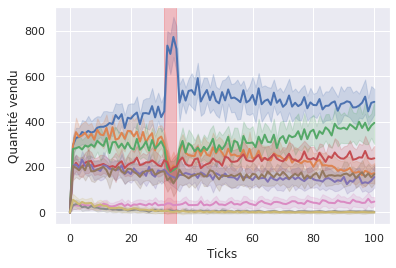

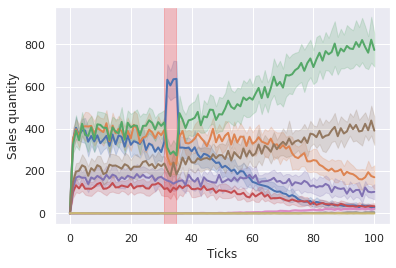

In [11]:
for key in dproducts.keys():
    df = pd.DataFrame(data = dproducts[key])
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    new_color =  plt.plot(df.index , df.moy, linewidth=2, linestyle='-',
    label='exp')[0].get_color()
    plt.fill_between(df.index,df.moy-(df.ecart), df.moy+(df.ecart),
    color=new_color, alpha=0.2)
plt.ylabel("Quantité vendu")
plt.xlabel("Ticks")
plt.axvspan(31, 35, alpha=0.2, color='red')
plt.show()
# plt.savefig("NbAcheteurs0.svg",bbox_inches='tight')


for key in dproducts2.keys():
    df = pd.DataFrame(data = dproducts2[key])
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    new_color = plt.plot(df.index , df.moy, linewidth=2, linestyle='-',
    label='exp')[0].get_color()
    plt.fill_between(df.index,df.moy-(df.ecart), df.moy+(df.ecart),
    color=new_color, alpha=0.2)
plt.ylabel("Sales quantity")
plt.xlabel("Ticks")
plt.axvspan(31, 35, alpha=0.2, color='red')
plt.savefig("qualitePrixPop.svg",bbox_inches='tight')
plt.show()

#### Population classique (5 profils répartis uniformément) et population composée uniquement d'agents orientés qualité/prix.

In [12]:
drevenues = {}
dproducts = {}
drevenues2 = {}
dproducts2 = {}
for i in range(20):
    print(i,end=" ")
    # Simulation avec promotion
    np.random.seed(3) # Random seed set for the generation of packs and agents to have the same on all simulations.
    test = generate_pack_categorie("bananas") # Creation of the category of packs
    sma20Promo = SMA([test],300,100)
#     sma10Promo.initialize(price=1, quality=4, promophile=1, sat_alpha=2, phi=0.3, c = 3, inertia = 3)
    sma20Promo.initialize(price = 5, quality = 10, promophile = 0.5, inertia = 1)
    sma20Promo.makePromo(0,20,(30,34),"bananas","bananas0")
    np.random.seed(int(10000 * time.time()) % 2**32) # We reintegrate randomness before launching the simulation.
    sma20Promo.run()
    
    # Simulation avec une promotion plus longue (20 ticks)
    np.random.seed(3) # Random seed set for the generation of packs and agents to have the same on all simulations.
    test = generate_pack_categorie("bananas") # Creation of the category of packs
    sma20promo2 = SMA([test],0,100)
    a = []
    for k in range(300):
        a += [Agent("Agent "+str(k), sma20promo2, profil=Profil({'price':  1,
                                                                 'quality': 1,
                                                                 'inertia': np.random.randint(3,15),
                                                                 'promophile':1}))]
    sma20promo2.addAgent(a)
    #sma10LongPromo.initialize(price=1, quality=4, promophile=1, sat_alpha=2, phi=0.3, c = 3, inertia = 3)
    sma20promo2.initialize(price = 5, quality = 10, promophile = 0.5, inertia = 1)
    sma20promo2.makePromo(0,20,(30,34),"bananas","bananas0")
    np.random.seed(int(10000 * time.time()) % 2**32) # We reintegrate randomness before launching the simulation.
    sma20promo2.run()
    
    drevenues[i] = sma20Promo.revenues
    drevenues2[i] = sma20promo2.revenues
    j=0
    for pack in sma20Promo.packs_categories[0].pack_list:  #Cette ligne ne fonctionne qu'avec une seule catégorie. 
        if not j in dproducts.keys():
            dproducts[j] = {}
        dproducts[j][i] = sma20Promo.cumulative_nb_bought_per_pack[pack.name]
        j+=1
    j=0
    for pack in sma20promo2.packs_categories[0].pack_list:  #Cette ligne ne fonctionne qu'avec une seule catégorie. 
        if not j in dproducts2.keys():
            dproducts2[j] = {}
        dproducts2[j][i] = sma20promo2.cumulative_nb_bought_per_pack[pack.name]
        j+=1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

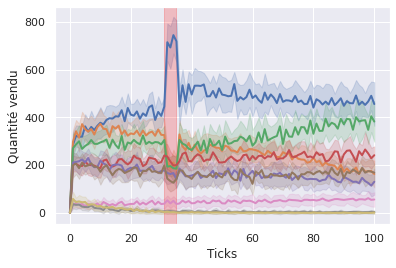

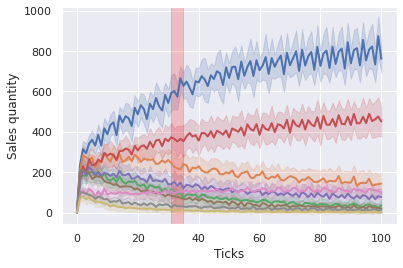

In [13]:
for key in dproducts.keys():
    df = pd.DataFrame(data = dproducts[key])
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    new_color =  plt.plot(df.index , df.moy, linewidth=2, linestyle='-',
    label='exp')[0].get_color()
    plt.fill_between(df.index,df.moy-(df.ecart), df.moy+(df.ecart),
    color=new_color, alpha=0.2)
plt.ylabel("Quantité vendu")
plt.xlabel("Ticks")
plt.axvspan(31, 35, alpha=0.2, color='red')
plt.show()
# plt.savefig("NbAcheteurs0.svg",bbox_inches='tight')


for key in dproducts2.keys():
    df = pd.DataFrame(data = dproducts2[key])
    df['moy']= df.mean(axis=1)
    df['ecart']= df.std(axis=1)
    new_color = plt.plot(df.index , df.moy, linewidth=2, linestyle='-',
    label='exp')[0].get_color()
    plt.fill_between(df.index,df.moy-(df.ecart), df.moy+(df.ecart),
    color=new_color, alpha=0.2)
plt.ylabel("Sales quantity")
plt.xlabel("Ticks")
plt.axvspan(31, 35, alpha=0.2, color='red')
plt.savefig("InertiePop.svg",bbox_inches='tight')
plt.show()

#### Modification des profils (nouveaux profils, nouvelle génération de profils)